# Aviation Safety Risk Analysis  

## Business Understanding

### Stakeholder
The primary stakeholder for this project is the Head of the new Aviation Division, who is responsible for making aircraft purchasing and operational decisions.

### Business Problem
As the company expands into the aviation industry, it faces significant safety and financial risks associated with aircraft operations. The organization lacks historical insight into which aircraft types and manufacturers have lower accident risk, making it difficult to make informed purchasing decisions.

### Project Goal
The goal of this project is to analyze historical aviation accident data to identify aircraft with lower operational risk. This analysis will support data-driven decisions about which aircraft the company should prioritize when entering the aviation market.

### Key Business Questions
- Which aircraft makes and models have historically been involved in fewer and less severe accidents?
- Are there trends in accident frequency or severity over time?
- Which aircraft characteristics are associated with lower overall risk?

### Success Criteria
This project will be considered successful if it produces clear, data-backed insights that lead to three actionable recommendations for selecting lower-risk aircraft.
## Data Understanding & Initial Exploration

### Business Context
Our company is evaluating entry into the aviation industry.  
To minimize operational risk, we analyze historical aviation accident data to understand trends, data quality, and relevant risk indicators.

### Objective of This Step
- Understand dataset structure
- Identify relevant variables
- Detect missing or inconsistent data
- Inform data cleaning and analysis decisions
- successfully load dataset
- understand the time range of the data


**IMPORT LIBRARIES**

In [31]:
import pandas as pd # for data manipulation
import numpy as np # numerical handling
import matplotlib.pyplot as plt # exploring visuals
import seaborn as sns
import os
os.getcwd()
os.listdir("..")


pd.set_option("display.max_columns", None)

In [32]:
os.listdir("../data")

['AviationData.csv']

**LOAD DATA**

In [33]:
data_path = "../data/AviationData.csv"
df = pd.read_csv(data_path, encoding="latin1")

C:\Users\HomePC\AppData\Local\Temp\ipykernel_29956\4176801064.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path, encoding="latin1")


In [34]:
df.shape # This shows how many rows and columns we have in our dataset

(88889, 31)

**Preview the Data**

In [35]:
df.head() # shows the first five rows

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [36]:
df.tail() # shows the last five rows

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N9026P,PIPER,PA-24-260,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


**Understand Column Structure**

In [37]:
df.info() #Look for:

#Column names

#Data types

#Missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

**Summary Statistics**

In [38]:
df.describe(include="all")

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50132,52704,87889,85695,32287,87507,88826,88797,88787,82805.000000,81793,32023,12582,82697,16648,77488.000000,76379.000000,76956.000000,82977.000000,84397,61724,82505,75118
unique,87951,2,88863,14782,27758,219,25592,27156,10374,24870,109,4,15,79104,8237,12318,2,NaN,12,31,3,26,13590,NaN,NaN,NaN,NaN,4,12,17074,2924
top,20001212X19172,Accident,CEN22LA149,1984-06-30,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,Non-Fatal,Substantial,Airplane,NONE,Cessna,152,No,NaN,Reciprocating,091,NSCH,Personal,Pilot,NaN,NaN,NaN,NaN,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,67357,64148,27617,344,22227,2367,80312,NaN,69530,18221,4474,49448,258,NaN,NaN,NaN,NaN,77303,15428,61754,17019
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.146585,NaN,NaN,NaN,NaN,NaN,0.647855,0.279881,0.357061,5.325440,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.446510,NaN,NaN,NaN,NaN,NaN,5.485960,1.544084,2.235625,27.913634,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,NaN


**Check Missing Values (Very Important)**

In [39]:
df.isnull().sum().sort_values(ascending=False).head(15)

Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Airport.Code              38757
Airport.Name              36185
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7096
Report.Status              6384
dtype: int64

## Initial Observations

- The dataset contains aviation accident records across multiple years.
- Several columns contain significant missing values.
- Injury-related fields and aircraft information appear relevant for risk analysis.
- Some categorical fields may require standardization during cleaning.


**TIME COVERAGE**

In [40]:
df["Event.Date"] = pd.to_datetime(df["Event.Date"], errors="coerce")

df["Event.Date"].min(), df["Event.Date"].max()

(Timestamp('1948-10-24 00:00:00'), Timestamp('2022-12-29 00:00:00'))

This confirms:

Earliest year

Latest year

Whether dates parse correctly

**DATA PREPARATION**

By the end of this step, you will:

Identify risk-relevant columns

Reduce the dataset to a clean, focused subset

Handle missing values intentionally

Create basic risk metrics

Save a processed dataset for analysis & visualization

**Identify Risk-Relevant Columns**

We don’t need all columns. For aviation risk, the most important ones are:

**Aircraft & Event Info**

- Make
- Model

**Aircraft.Category**

- Event.Date
- severity / Risk Indicators
- Injury.Severity
- Total.Fatal.Injuries
- Total.Serious.Injuries
- Total.Minor.Injuries

**Select Columns**

In [41]:
risk_columns = [
    "Event.Date",
    "Make",
    "Model",
    "Aircraft.Category",
    "Injury.Severity",
    "Total.Fatal.Injuries",
    "Total.Serious.Injuries",
    "Total.Minor.Injuries"
]

risk_df = df[risk_columns].copy()

risk_df.head()

,Event.Date,Make,Model,Aircraft.Category,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
0,1948-10-24,Stinson,108-3,NaN,Fatal(2),2.0,0.0,0.0
1,1962-07-19,Piper,PA24-180,NaN,Fatal(4),4.0,0.0,0.0
2,1974-08-30,Cessna,172M,NaN,Fatal(3),3.0,NaN,NaN
3,1977-06-19,Rockwell,112,NaN,Fatal(2),2.0,0.0,0.0
4,1979-08-02,Cessna,501,NaN,Fatal(1),1.0,2.0,NaN


.copy() prevents accidental modification of the original data.

**Check Missing Values**

In [42]:
risk_df.isna().sum()

Event.Date                    0
Make                         63
Model                        92
Aircraft.Category         56602
Injury.Severity            1000
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
dtype: int64

This tells us:

Which columns are problematic

What cleaning strategy we need

**Cleaning Strategy**

- Drop rows missing Make or Model

- Convert injury counts to numeric

- Replace missing injury counts with 0
  Justification: missing often means “no injuries reported”

**Drop Rows Without Aircraft Info**

In [44]:
risk_df = risk_df.dropna(subset=["Make", "Model"]) # We cannot assess aircraft risk without knowing the aircraft


**Clean Injury Columns**

In [45]:
injury_cols = [
    "Total.Fatal.Injuries",
    "Total.Serious.Injuries",
    "Total.Minor.Injuries"
]

for col in injury_cols:
    risk_df[col] = pd.to_numeric(risk_df[col], errors="coerce").fillna(0)


**Create a Risk Metric**

Add total injuries as a simple risk proxy:

In [46]:
risk_df["Total.Injuries"] = (
    risk_df["Total.Fatal.Injuries"]
    + risk_df["Total.Serious.Injuries"]
    + risk_df["Total.Minor.Injuries"]
)

risk_df.head()


,Event.Date,Make,Model,Aircraft.Category,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Injuries
0,1948-10-24,Stinson,108-3,NaN,Fatal(2),2.0,0.0,0.0,2.0
1,1962-07-19,Piper,PA24-180,NaN,Fatal(4),4.0,0.0,0.0,4.0
2,1974-08-30,Cessna,172M,NaN,Fatal(3),3.0,0.0,0.0,3.0
3,1977-06-19,Rockwell,112,NaN,Fatal(2),2.0,0.0,0.0,2.0
4,1979-08-02,Cessna,501,NaN,Fatal(1),1.0,2.0,0.0,3.0


**Save Cleaned Dataset**

In [50]:
import os
os.makedirs("../data/processed", exist_ok=True)

In [51]:
risk_df.to_csv("../data/processed/aviation_cleaned.csv", index=False)


**EXPLORATORY DATA ANALYSIS (EDA) & RISK ANALYSIS**

This step answers:

“Which aircraft appear to be lower risk, based on historical accident data?”

This is where your recommendations will come from.

Let's confirm a fe things and that we are all set, no accidental overwrites

In [55]:
risk_df.shape # shows how many rows and columns we have

(88777, 9)

In [54]:
risk_df.head() # show the first five rows


,Event.Date,Make,Model,Aircraft.Category,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Injuries
0,1948-10-24,Stinson,108-3,NaN,Fatal(2),2.0,0.0,0.0,2.0
1,1962-07-19,Piper,PA24-180,NaN,Fatal(4),4.0,0.0,0.0,4.0
2,1974-08-30,Cessna,172M,NaN,Fatal(3),3.0,0.0,0.0,3.0
3,1977-06-19,Rockwell,112,NaN,Fatal(2),2.0,0.0,0.0,2.0
4,1979-08-02,Cessna,501,NaN,Fatal(1),1.0,2.0,0.0,3.0


**Accident Count by Manufacturer**

This tells us exposure (how often aircraft appear in accidents):

In [57]:
make_counts = (
    risk_df["Make"]
    .value_counts()
    .head(10)
)

make_counts


# High counts = unsafe

Make
Cessna     22226
Piper      12029
CESSNA      4919
Beech       4330
PIPER       2840
Bell        2134
Boeing      1593
BOEING      1145
Grumman     1094
Mooney      1092
Name: count, dtype: int64

**Average Injury Risk by Manufacturer**

Now we look at severity, not just frequency.

In [59]:
manufacturer_risk = (
    risk_df
    .groupby("Make")
    .agg(
        avg_total_injuries=("Total.Injuries", "mean"),
        accident_count=("Total.Injuries", "count")
    )
    .sort_values("avg_total_injuries")
)

manufacturer_risk.head(10)


# Lower average injuries = lower risk per incident. This is key for purchasing decisions


,avg_total_injuries,accident_count
Make,,
SEWELL WILLIAM K,0.0,1
Robinson Helicopter Co.,0.0,1
Fornaire,0.0,1
Forster,0.0,1
Robinette,0.0,1
Fortuna,0.0,1
Robert Wood,0.0,1
Robert W. Ferrell,0.0,1
Robert Van Scoyoc,0.0,1


**Filter for Meaningful Sample Size**

We should avoid manufacturers with very few incidents.

In [60]:
filtered_risk = manufacturer_risk[
    manufacturer_risk["accident_count"] >= 50
]

filtered_risk.head(10)


,avg_total_injuries,accident_count
Make,,
AVIAT AIRCRAFT INC,0.319444,72
GRUMMAN ACFT ENG COR-SCHWEIZER,0.327586,58
Grumman-schweizer,0.355372,121
Weatherly,0.379310,87
Air Tractor,0.415126,595
AIR TRACTOR INC,0.437788,217
MAULE,0.451389,144
Ayres,0.452830,212
Aviat,0.455357,112


**Lowest Risk Manufacturers**

Create a bar chart:

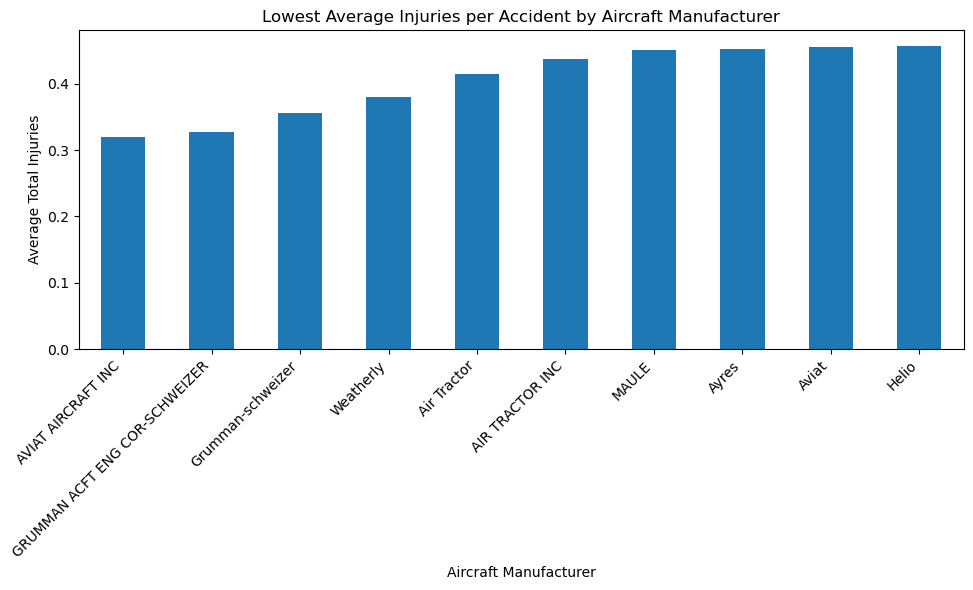

In [61]:
plt.figure(figsize=(10, 6))

filtered_risk["avg_total_injuries"].head(10).plot(kind="bar")

plt.title("Lowest Average Injuries per Accident by Aircraft Manufacturer")
plt.ylabel("Average Total Injuries")
plt.xlabel("Aircraft Manufacturer")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()
